# Movie recommendation system

Recommeder system is a system to predict or filter preferences according to the users choice . Recommended system are untilized a variety of areas including movies , music,  books, research articles, search queries , social tags,  and products in general recommender systems produce a list of recommender n any of the two ways:

collaborating filtering - approches a build a model from the user's past behavior (i.e items purchased or searched by the user) as well as similar decisions made by other users. this model is then used items(or rating fro items that users may have an interesr in.

content based filtering - approches users a series of discrete characteristics of an item in order to recommend additional items with similar properties. Content baesd filtering methods are totally based on a description of the item and a profit of the user's preferences . iy recommends based on the user's past preferences .

# Import Library

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Import Dataset

In [ ]:
data = "/content/drive/MyDrive/Datasets/movies.csv"
df = pd.read_csv(data)
df.head()

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
4,Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)


In [ ]:
df.head(5)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
4,Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)


# Describe Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1629 entries, 0 to 1628
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title_x           1629 non-null   object 
 1   imdb_id           1629 non-null   object 
 2   poster_path       1526 non-null   object 
 3   wiki_link         1629 non-null   object 
 4   title_y           1629 non-null   object 
 5   original_title    1629 non-null   object 
 6   is_adult          1629 non-null   int64  
 7   year_of_release   1629 non-null   int64  
 8   runtime           1629 non-null   object 
 9   genres            1629 non-null   object 
 10  imdb_rating       1629 non-null   float64
 11  imdb_votes        1629 non-null   int64  
 12  story             1609 non-null   object 
 13  summary           1629 non-null   object 
 14  tagline           557 non-null    object 
 15  actors            1624 non-null   object 
 16  wins_nominations  707 non-null    object 


In [ ]:
df.shape


(1629, 18)

In [ ]:
df.columns

Index(['title_x', 'imdb_id', 'poster_path', 'wiki_link', 'title_y',
       'original_title', 'is_adult', 'year_of_release', 'runtime', 'genres',
       'imdb_rating', 'imdb_votes', 'story', 'summary', 'tagline', 'actors',
       'wins_nominations', 'release_date'],
      dtype='object')

# Data Visualization

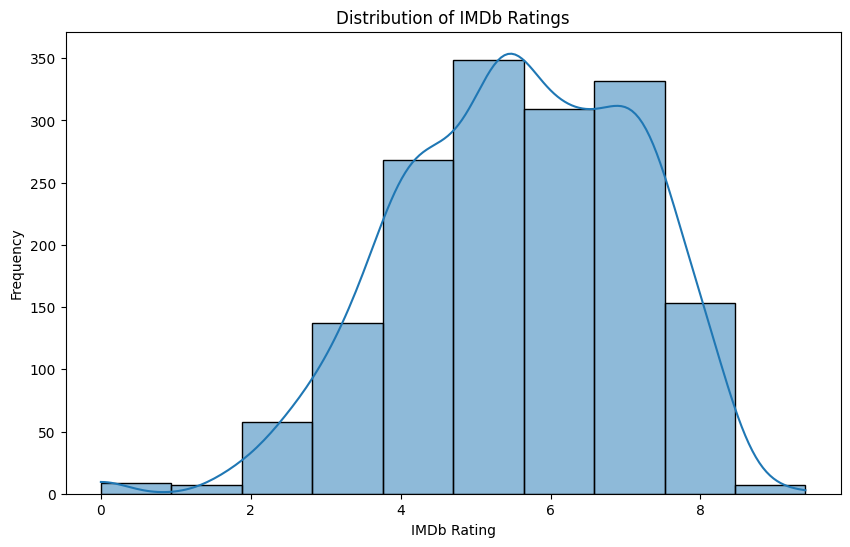

In [ ]:
#Movie Ratings Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['imdb_rating'].dropna(), bins=10, kde=True)
plt.title('Distribution of IMDb Ratings')
plt.xlabel('IMDb Rating')
plt.ylabel('Frequency')
plt.show()


<ipython-input-17-e8a72ba22fc8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='imdb_rating', y='title_x', data=top_rated_movies, palette='viridis')


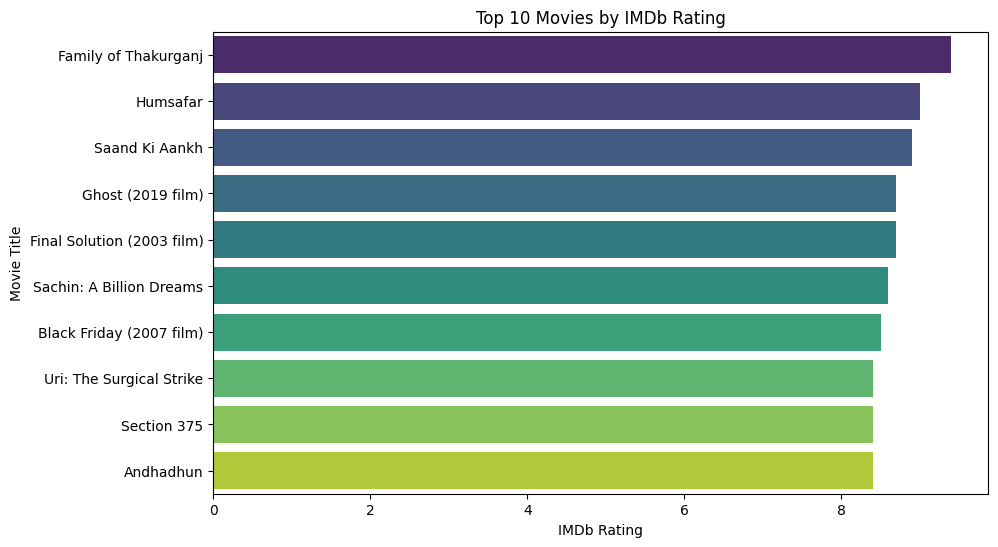

In [ ]:
#Top 10 Movies by IMDb Rating

top_rated_movies = df.nlargest(10, 'imdb_rating')[['title_x', 'imdb_rating']]
plt.figure(figsize=(10, 6))
sns.barplot(x='imdb_rating', y='title_x', data=top_rated_movies, palette='viridis')
plt.title('Top 10 Movies by IMDb Rating')
plt.xlabel('IMDb Rating')
plt.ylabel('Movie Title')
plt.show()



<ipython-input-18-5203dadf5044>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='coolwarm')


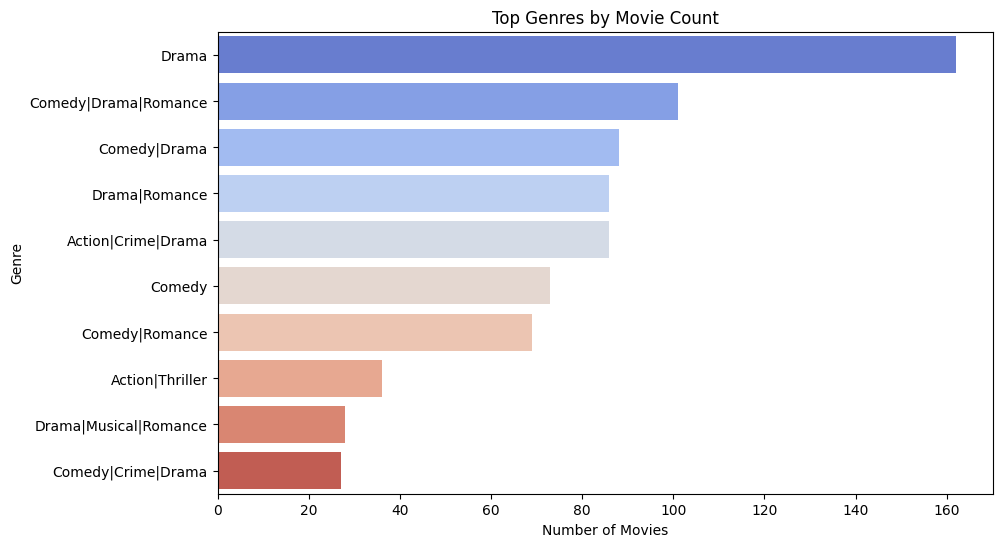

In [ ]:
#Movie Count by
# Splitting genres and creating a list of all genres
all_genres = df['genres'].dropna().str.split(',').explode().str.strip()
genre_counts = all_genres.value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='coolwarm')
plt.title('Top Genres by Movie Count')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()



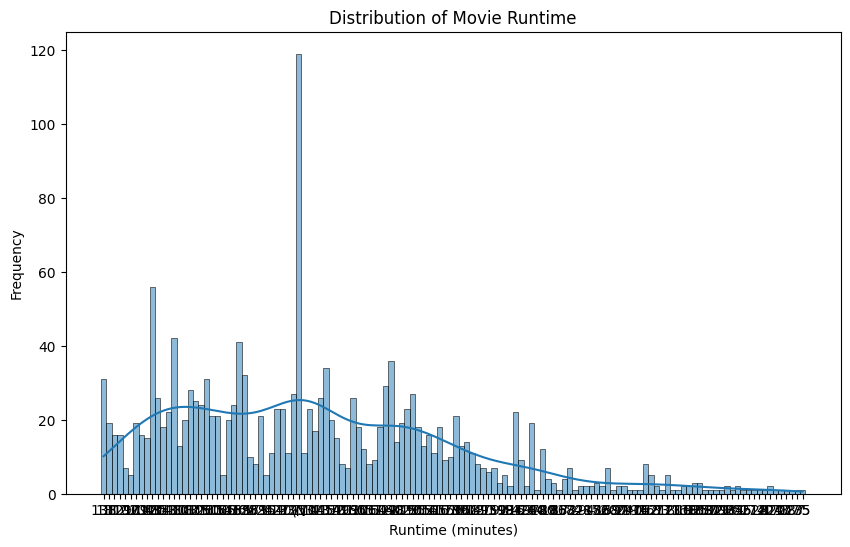

In [ ]:
#Movie Runtime Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['runtime'].dropna(), bins=20, kde=True)
plt.title('Distribution of Movie Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.show()



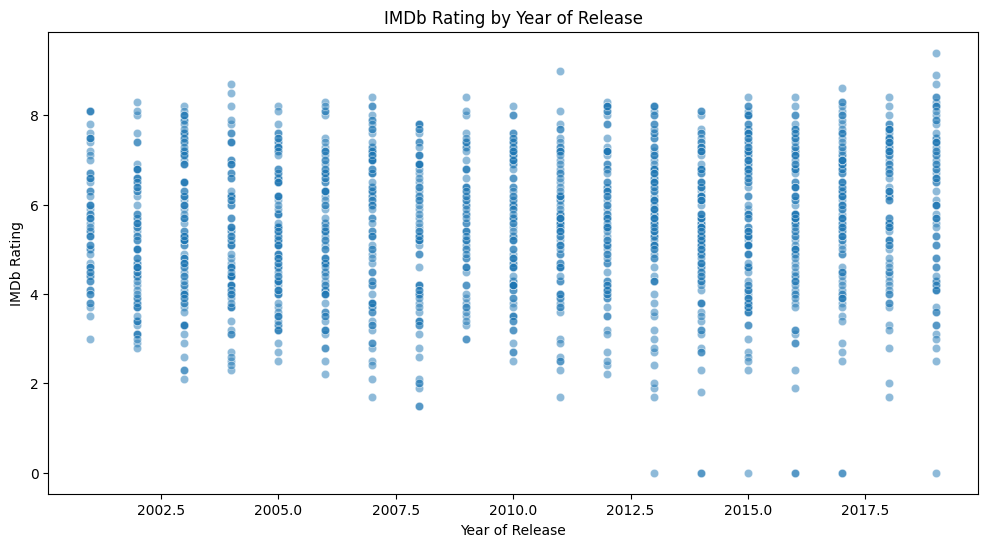

In [ ]:
#Year of Release vs IMDb Rating
plt.figure(figsize=(12, 6))
sns.scatterplot(x='year_of_release', y='imdb_rating', data=df, alpha=0.5)
plt.title('IMDb Rating by Year of Release')
plt.xlabel('Year of Release')
plt.ylabel('IMDb Rating')
plt.show()


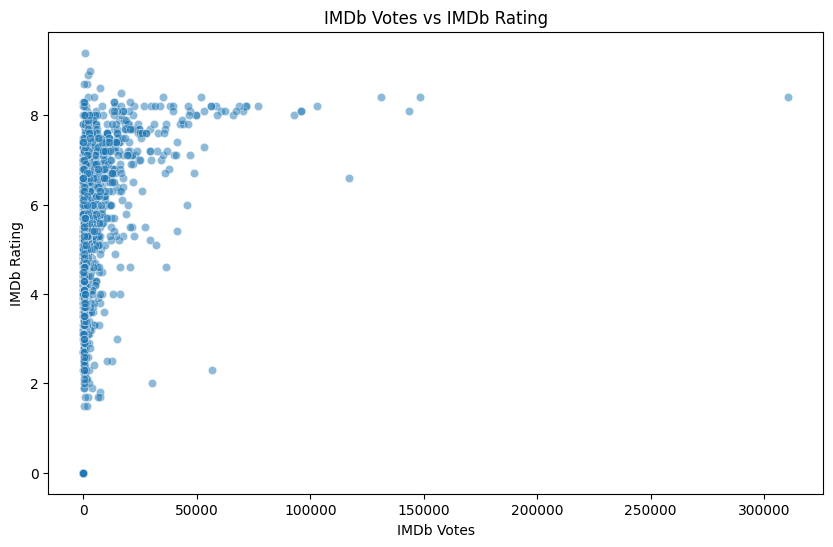

In [ ]:
#IMDb Votes vs IMDb Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='imdb_votes', y='imdb_rating', data=df, alpha=0.5)
plt.title('IMDb Votes vs IMDb Rating')
plt.xlabel('IMDb Votes')
plt.ylabel('IMDb Rating')
plt.show()


<ipython-input-22-eabfb15652eb>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=actor_counts.values, y=actor_counts.index, palette='magma')


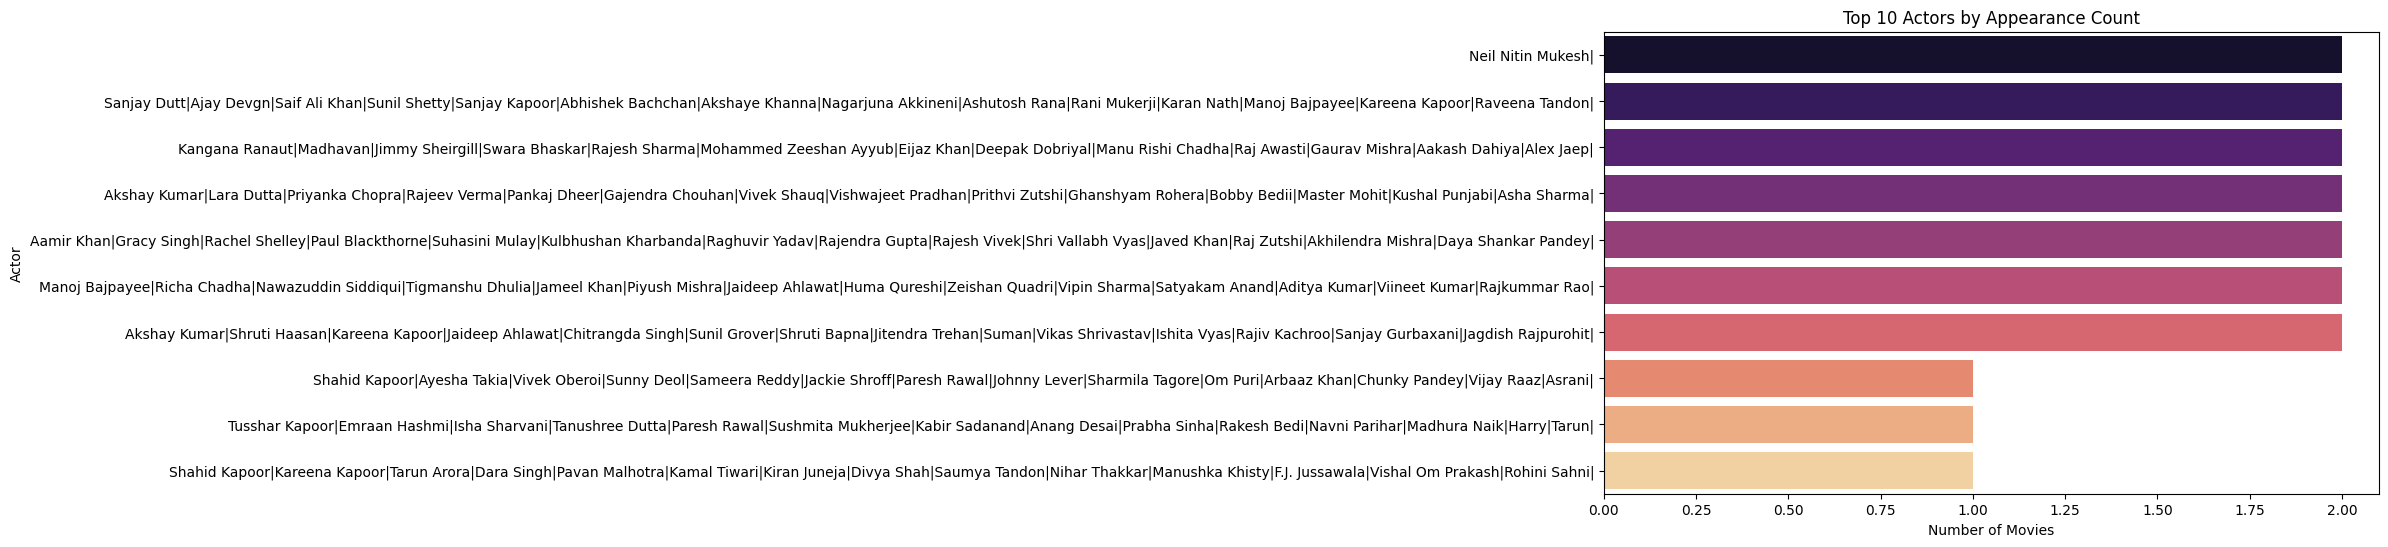

In [ ]:
#Top Actors by Appearance Count

# Splitting actors and creating a list of all actors
all_actors = df['actors'].dropna().str.split(',').explode().str.strip()
actor_counts = all_actors.value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=actor_counts.values, y=actor_counts.index, palette='magma')
plt.title('Top 10 Actors by Appearance Count')
plt.xlabel('Number of Movies')
plt.ylabel('Actor')
plt.show()



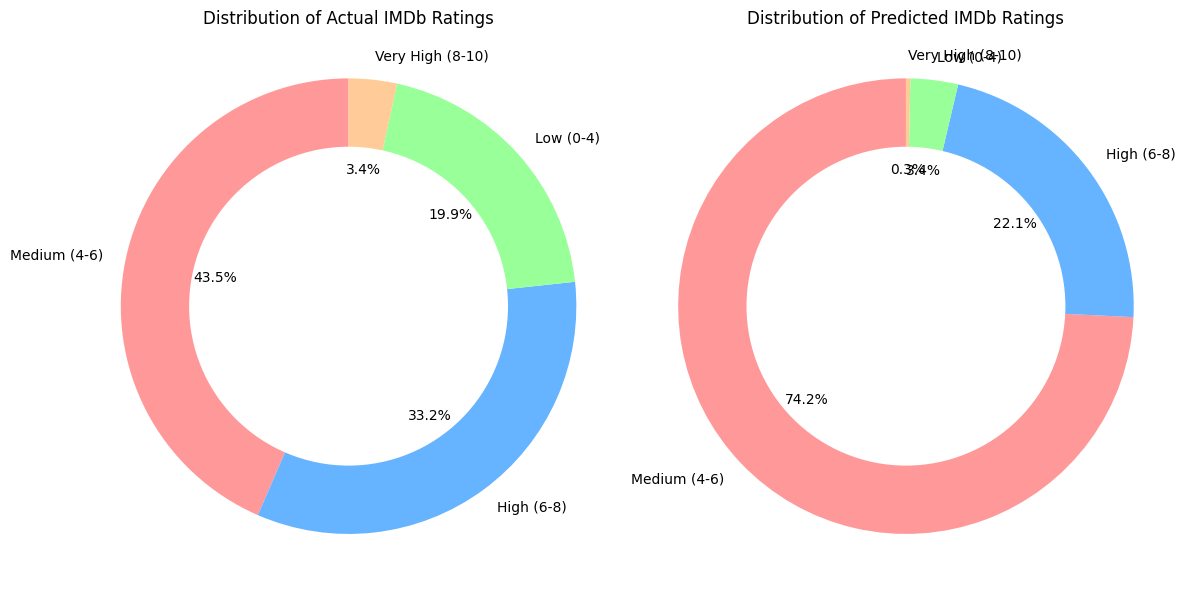

In [ ]:
import matplotlib.pyplot as plt

# Create bins for the ratings
bins = [0, 4, 6, 8, 10]
labels = ['Low (0-4)', 'Medium (4-6)', 'High (6-8)', 'Very High (8-10)']

# Create a DataFrame to categorize the actual and predicted ratings
results_df['Actual Category'] = pd.cut(results_df['Actual IMDb Rating'], bins=bins, labels=labels)
results_df['Predicted Category'] = pd.cut(results_df['Predicted IMDb Rating'], bins=bins, labels=labels)

# Count the occurrences in each category
actual_counts = results_df['Actual Category'].value_counts()
predicted_counts = results_df['Predicted Category'].value_counts()

# Create Donut Chart
plt.figure(figsize=(12, 6))

# Subplot for Actual Ratings
plt.subplot(1, 2, 1)
plt.pie(actual_counts, labels=actual_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Distribution of Actual IMDb Ratings')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Subplot for Predicted Ratings
plt.subplot(1, 2, 2)
plt.pie(predicted_counts, labels=predicted_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Distribution of Predicted IMDb Ratings')
plt.axis('equal')

# Show the plots
plt.tight_layout()
plt.show()


# Data Preprocessing

In [ ]:


# Display initial information about the dataset
print(df.info())
print(df.isnull().sum())  # Checking for missing values

# Step 1: Handling Missing Values
# Filling missing values for 'runtime' with median
df['runtime'].fillna(df['runtime'].median(), inplace=True)

# Filling missing values in 'imdb_rating' and 'imdb_votes' with 0, assuming movies with no ratings are unrated
df['imdb_rating'].fillna(0, inplace=True)
df['imdb_votes'].fillna(0, inplace=True)

# Dropping rows where essential fields are missing (e.g., 'title_x', 'year_of_release')
df.dropna(subset=['title_x', 'year_of_release'], inplace=True)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1629 entries, 0 to 1628
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title_x           1629 non-null   object 
 1   imdb_id           1629 non-null   object 
 2   poster_path       1526 non-null   object 
 3   wiki_link         1629 non-null   object 
 4   title_y           1629 non-null   object 
 5   original_title    1629 non-null   object 
 6   is_adult          1629 non-null   int64  
 7   year_of_release   1629 non-null   int64  
 8   runtime           1629 non-null   object 
 9   genres            1629 non-null   object 
 10  imdb_rating       1629 non-null   float64
 11  imdb_votes        1629 non-null   int64  
 12  story             1609 non-null   object 
 13  summary           1629 non-null   object 
 14  tagline           557 non-null    object 
 15  actors            1624 non-null   object 
 16  wins_nominations  707 non-null    object 


TypeError: Cannot convert ['138' '131' '112' ... '\\N' '136' '35'] to numeric

In [ ]:
# Step 1: Convert the 'runtime' column to numeric, forcing any non-numeric values to NaN
df['runtime'] = pd.to_numeric(df['runtime'], errors='coerce')

# Step 2: Now fill missing values in 'runtime' with the median of the column
df['runtime'].fillna(df['runtime'].median(), inplace=True)


<ipython-input-24-2abb89f77973>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['runtime'].fillna(df['runtime'].median(), inplace=True)


# Define Traget Vriable (y) and Feature Varibales (x)

In [ ]:


# Step 1: Define the target variable
y = df['imdb_rating']

# Step 2: Define feature variables
# Selecting relevant features and performing encoding where necessary
X = df[['runtime', 'year_of_release', 'imdb_votes']]

# One-hot encoding for the 'genres' column (converts genres to dummy variables)
X = pd.concat([X, df['genres'].str.get_dummies(sep=',')], axis=1)

# Step 3: Splitting the dataset into training and testing sets (if required)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train test Split

In [ ]:


# Split the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1303, 208)
X_test shape: (326, 208)
y_train shape: (1303,)
y_test shape: (326,)


# Modeling

In [ ]:


# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 2.2428458089508347
R-squared (R2) Score: 0.10247495254058459


# Model Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

n = len(y_test)  # Number of samples
p = X_test.shape[1]  # Number of predictors/features

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R-squared:", adjusted_r2)

Mean Absolute Error (MAE): 1.1747141797785372
Mean Squared Error (MSE): 2.2428458089508347
Root Mean Squared Error (RMSE): 1.4976133709842587
Adjusted R-squared: -1.4931251318317096


# Model Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Adjusted R-squared calculation
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Display results
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)
print("Adjusted R-squared:", adjusted_r2)


Mean Absolute Error (MAE): 1.1747141797785372
Mean Squared Error (MSE): 2.2428458089508347
Root Mean Squared Error (RMSE): 1.4976133709842587
R-squared (R2) Score: 0.10247495254058459
Adjusted R-squared: -1.4931251318317096


# Prediction

In [ ]:
# Making predictions on the test set
y_pred = model.predict(X_test)

# Creating a DataFrame to compare actual vs predicted values
import pandas as pd

# Assuming you have the 'title_x' from the original DataFrame for reference
results_df = pd.DataFrame({
    'Actual IMDb Rating': y_test,
    'Predicted IMDb Rating': y_pred
})

# Display the results
print(results_df.head(10))  # Show the first 10 predictions


      Actual IMDb Rating  Predicted IMDb Rating
669                  8.1               6.743010
251                  6.5               6.016461
538                  5.7               4.977439
300                  5.7               5.127552
352                  5.8               5.480722
350                  5.7               6.209634
1263                 4.5               5.221969
1377                 3.7               4.249854
1323                 6.6               4.575254
631                  5.7               6.125751


# Explaination

### Explanation
* Predict: The model's predict method generates predictions based on the test features (X_test).
* Comparison DataFrame: A new DataFrame results_df is created to visualize and compare actual and predicted IMDb ratings. This is particularly useful for understanding how well your model performs on specific entries.
* Display: Using head(10) to show the first ten actual vs predicted ratings allows for a quick inspection of your model's performance.